# AR(p)
# Autoregressive Model
In a moving average model as we saw with Holt-Winters, we forecast the variable of interest using a linear combination of predictors. In our example we forecasted numbers of airline passengers in thousands based on a set of level, trend and seasonal predictors.

In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

### $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an <strong>AR(2)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models <strong>AR(3)</strong> and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html'>ar_model.AR</a></strong><font color=black>(endog[, dates, freq, missing])</font>&nbsp;&nbsp;Autoregressive AR(p) model<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.ARResults.html'>ar_model.ARResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Class to hold results from fitting an AR model</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/AR.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive models</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Autoregressive_model'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive model</font></div>

In [127]:
import pandas as pd
import numpy as np
%matplotlib inline

In [128]:
from statsmodels.tsa.ar_model import AutoReg, ARResults

In [129]:
df = pd.read_csv('C:/Users/thaku/Downloads/m23/time_series/Data/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [130]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [131]:
# month wise data so we use MS

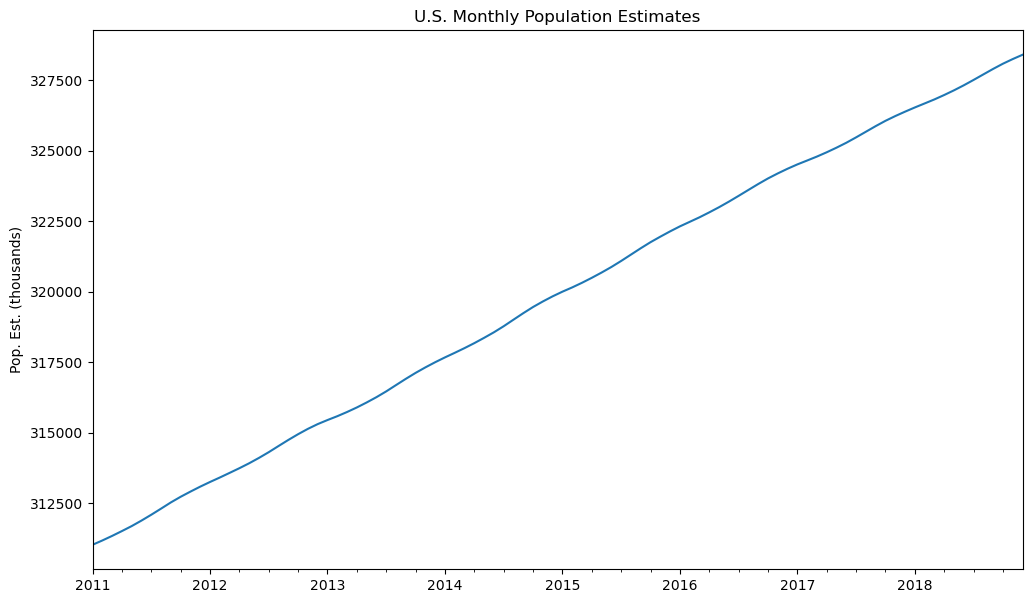

In [132]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'
xlabel='' # we don't really need a label here

ax = df['PopEst'].plot(figsize = (12,7), title = title)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Split the data into train/test sets
The goal in this section is to:
* Split known data into a training set of records on which to fit the model
* Use the remaining records for testing, to evaluate the model
* Fit the model again on the <em>full</em> set of records
* Predict a future set of values using the model

As a general rule you should set the length of your test set equal to your intended forecast size. That is, for a monthly dataset you might want to forecast out one more year. Therefore your test set should be one year long.

<div class="alert alert-info"><strong>NOTE: </strong>For many training and testing applications we would use the <tt>train_test_split()</tt> function available from Python's <a href='https://scikit-learn.org/stable/'>scikit-learn</a> library. This won't work here as <tt>train_test_split()</tt> takes <em>random samples</em> of data from the population.</div>

In [133]:
len(df)

96

In [134]:
# Set one year for testing
train = df.iloc[:84]
test = df.iloc[84:]

## Fit an AR(1) Model

In [135]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [136]:
model = AutoReg(train['PopEst'], lags = 1)

In [137]:
AR1fit = model.fit()

In [138]:
AR1fit.params

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [139]:
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [140]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

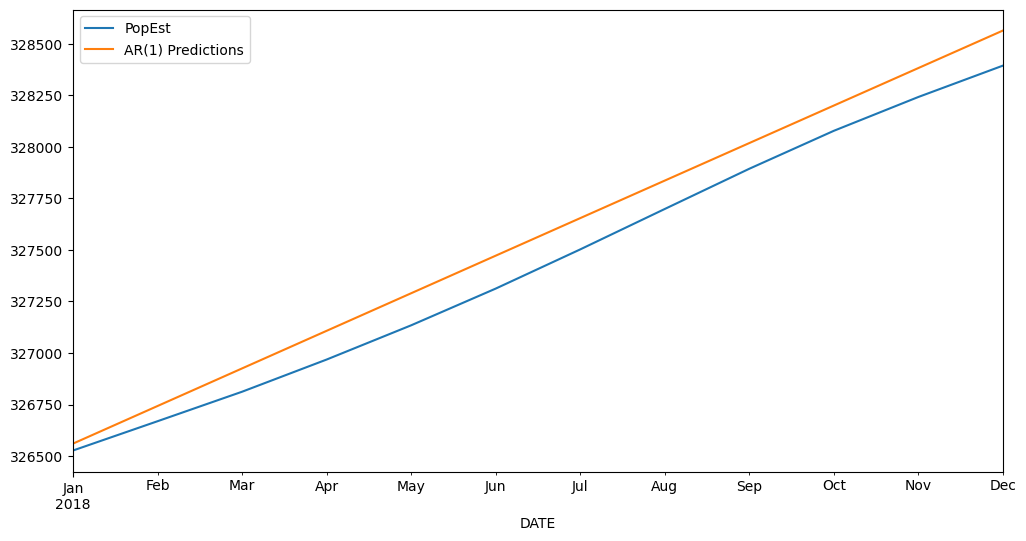

In [141]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

## Fit an AR(2) Model

In [142]:
model = AutoReg(train['PopEst'], lags = 1)

In [143]:
AR2fit = model.fit()

In [144]:
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

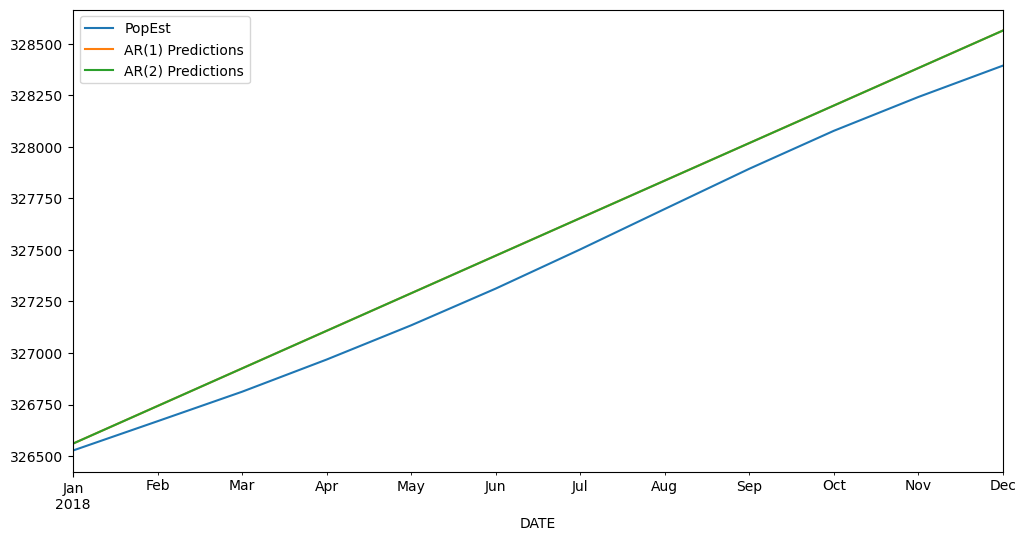

In [145]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

## Fit an AR(p) model where statsmodels chooses p
This time we'll omit the <tt>maxlag</tt> argument in <tt>AR.fit()</tt> and let statsmodels choose a p-value for us.

In [168]:
max_lags = 15
model = AutoReg(train['PopEst'], lags = None)
ARxfit = model.fit()

In [171]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg


max_lags = 10
results_aic = []

# Loop through possible lags
for lag in range(1, max_lags + 1):
    try:
        model = AutoReg(train['PopEst'], lags=lag)
        results = model.fit()
        results_aic.append((lag, results.aic))  # Store lag and AIC
    except Exception as e:
        print(f"Error with lag {lag}: {e}")

# Find the lag with the minimum AIC
best_lag_aic = min(results_aic, key=lambda x: x[1])
print(f"Best lag according to AIC: {best_lag_aic[0]}, AIC: {best_lag_aic[1]}")

# Optionally, repeat for BIC
results_bic = []
for lag in range(1, max_lags + 1):
    model = AutoReg(train['PopEst'], lags=lag)
    results = model.fit()
    results_bic.append((lag, results.bic))  # Store lag and BIC

# Find the lag with the minimum BIC
best_lag_bic = min(results_bic, key=lambda x: x[1])
print(f"Best lag according to BIC: {best_lag_bic[0]}, BIC: {best_lag_bic[1]}")

# Fit the final model using the best lag based on your preferred criterion
final_model = AutoReg(train['PopEst'], lags=best_lag_aic[0]).fit()  # or best_lag_bic[0]


Best lag according to AIC: 10, AIC: 470.26240048106865
Best lag according to BIC: 10, BIC: 497.9111815995187


In [172]:
rename = f'AR(x) Predictions'

final_model = final_model.predict(start=start,end=end,dynamic=False).rename(rename)

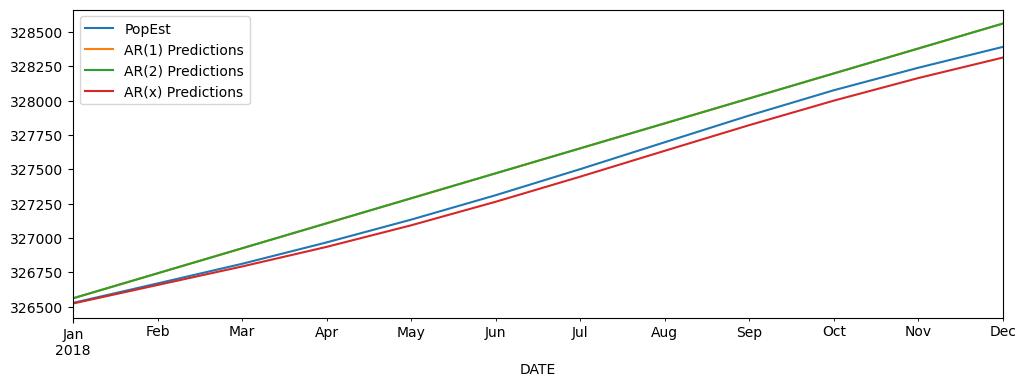

In [173]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
final_model.plot(legend=True,figsize=(12,4));

## Evaluate the Model
It helps to have a means of comparison between two or more models. One common method is to compute the Mean Squared Error (MSE), available from scikit-learn.

In [152]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(11)']
preds = [predictions1, predictions2, predictions11]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 17449.71424
AR(2) Error: 17449.71424
AR(11) Error: 75980752.48


In [155]:
modls = [AR1fit,AR2fit,ARxfit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 767.64
AR(2) AIC: 767.64
AR(11) AIC: 1657.0


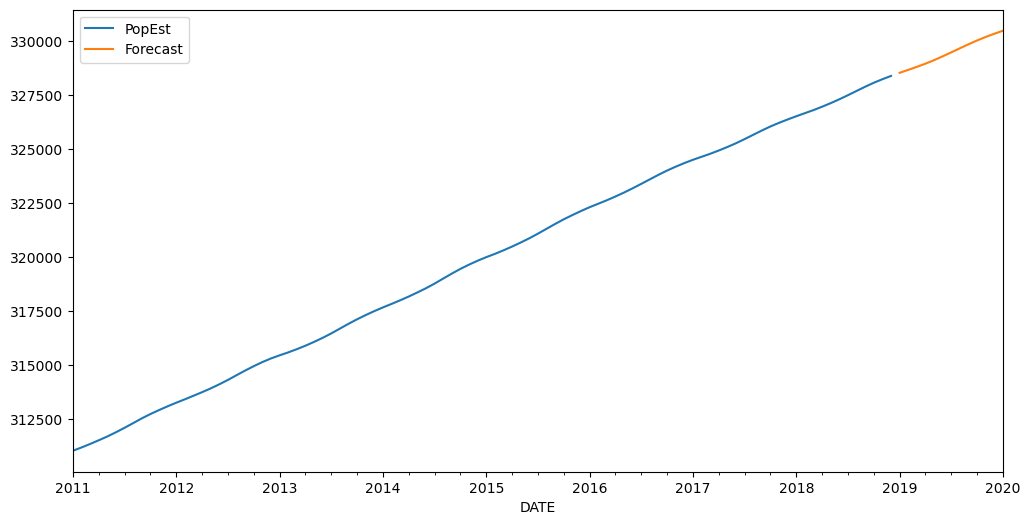

In [160]:
# First, retrain the model on the full dataset
model = AutoReg(df['PopEst'],lags=11,)

# Next, fit the model
ARfit = model.fit()

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')

# Plot the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));